word count: 2995

# Part 1.I: London's Underground Resilience
## I.(1). Centrality Measures

Centrality measures help us understand which nodes (stations in our context) are most influential within a network. We will calculate three types of centrality:

1. **Degree Centrality:** Measures the number of direct connections a node has. Useful for finding nodes with high activity levels.
2. **Betweenness Centrality:** Identifies nodes that occur on many shortest paths between other nodes. Good for identifying bottleneck points in the network.
3. **Closeness Centrality:** Measures how quickly information spreads from a given node to other reachable nodes.

These measures will help us pinpoint critical stations that, if disrupted, could significantly impact the functionality of the entire system.



In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the network
G = nx.read_graphml('london.graph')

# Check the network
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 401
Number of edges: 467


In [2]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Convert to DataFrame for better handling
centrality_df = pd.DataFrame({
    "Station": G.nodes(),
    "Degree Centrality": degree_centrality.values(),
    "Betweenness Centrality": betweenness_centrality.values(),
    "Closeness Centrality": closeness_centrality.values()
})

# Sort and get top 10 stations for each measure
top_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)
top_betweenness = centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10)
top_closeness = centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10)


Centrality Measures Results

Below are the tables showing the top 10 ranked stations for each centrality measure, indicating their importance in the network's resilience and functionality.


In [3]:
# Display the tables
print("Top 10 Stations by Degree Centrality")
display(top_degree)

print("Top 10 Stations by Betweenness Centrality")
display(top_betweenness)

print("Top 10 Stations by Closeness Centrality")
display(top_closeness)


Top 10 Stations by Degree Centrality


,Station,Degree Centrality,Betweenness Centrality,Closeness Centrality
5,Stratford,0.0225,0.297846,0.104384
50,Bank and Monument,0.0200,0.290489,0.113572
229,King's Cross St. Pancras,0.0175,0.255307,0.113443
18,Baker Street,0.0175,0.191568,0.108962
180,Earl's Court,0.0150,0.125892,0.090416
45,Oxford Circus,0.0150,0.053844,0.111204
51,Liverpool Street,0.0150,0.270807,0.110254
14,Waterloo,0.0150,0.243921,0.112265
16,Green Park,0.0150,0.215835,0.114778
7,Canning Town,0.0150,0.096167,0.091575


Top 10 Stations by Betweenness Centrality


,Station,Degree Centrality,Betweenness Centrality,Closeness Centrality
5,Stratford,0.0225,0.297846,0.104384
50,Bank and Monument,0.0200,0.290489,0.113572
51,Liverpool Street,0.0150,0.270807,0.110254
229,King's Cross St. Pancras,0.0175,0.255307,0.113443
14,Waterloo,0.0150,0.243921,0.112265
16,Green Park,0.0150,0.215835,0.114778
150,Euston,0.0125,0.208324,0.109830
15,Westminster,0.0100,0.203335,0.112549
18,Baker Street,0.0175,0.191568,0.108962
21,Finchley Road,0.0100,0.165085,0.102617


Top 10 Stations by Closeness Centrality


,Station,Degree Centrality,Betweenness Centrality,Closeness Centrality
16,Green Park,0.0150,0.215835,0.114778
50,Bank and Monument,0.0200,0.290489,0.113572
229,King's Cross St. Pancras,0.0175,0.255307,0.113443
15,Westminster,0.0100,0.203335,0.112549
14,Waterloo,0.0150,0.243921,0.112265
45,Oxford Circus,0.0150,0.053844,0.111204
17,Bond Street,0.0100,0.141591,0.110988
230,Farringdon,0.0050,0.064110,0.110742
312,Angel,0.0050,0.064110,0.110742
232,Moorgate,0.0100,0.130169,0.110314


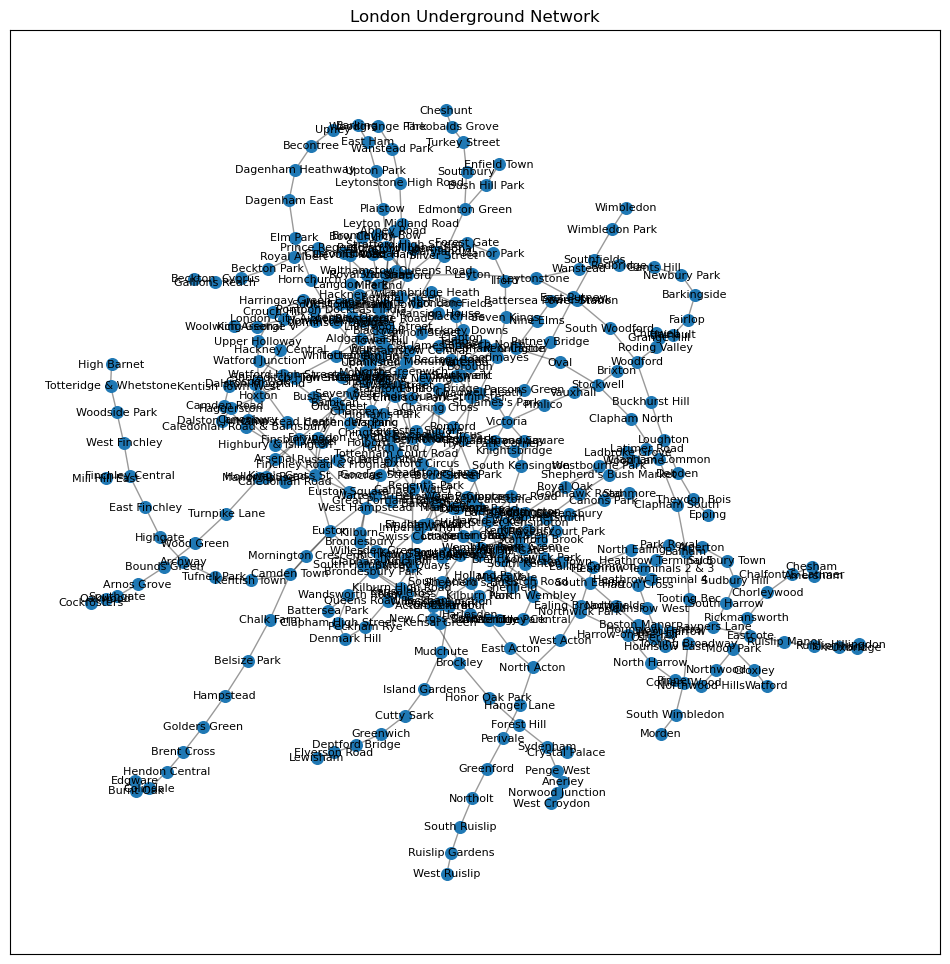

In [4]:
pos = nx.spring_layout(G)  # positions for all nodes

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=70)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='Black')

plt.title('London Underground Network')
plt.show()


# I.(2). Impact Measures

To assess the impact of node removal on the London Underground network, we will use two global measures:

1. **Network Diameter**: The maximum distance between any two nodes in the network. It helps us understand the largest separation within the network.
   - **Equation**: The diameter is $\max_{i,j} d(i, j)$ where $d(i, j)$ is the shortest path distance between nodes $i$ and $j$.


2. **Average Path Length**: This is the average number of steps along the shortest paths for all possible pairs of network nodes. It reflects the network's average efficiency or the 'closeness' of its nodes.
   - **Equation**: The average path length is $\frac{1}{n(n-1)} \sum_{i \neq j} d(i, j)$, where $n$ is the number of nodes in the network.

These measures are universally applicable to any networked system, making them excellent choices for analyzing not only transport systems like the Underground but also other types of networks, such as social, communication, or distribution networks.

In [5]:
import networkx as nx

# Calculate the initial network diameter and average path length
initial_diameter = nx.diameter(G)
initial_avg_path_length = nx.average_shortest_path_length(G)

print("Initial Network Diameter:", initial_diameter)
print("Initial Average Path Length:", initial_avg_path_length)

Initial Network Diameter: 36
Initial Average Path Length: 13.545997506234414


# I.(3). Node Removal

We will evaluate the resilience of the London Underground by removing nodes using two different strategies to understand the network's robustness:

1. **Non-sequential Removal:** Nodes are removed according to their initial centrality ranking. This approach simulates the effect of losing the most central nodes one by one, based on the original network structure.

2. **Sequential Removal:** After each node removal, centrality measures are recalculated for the remaining network. The next highest-ranked node is then removed based on the new calculations. This approach simulates a dynamic response where the network's most critical remaining node is always targeted next.

Both methods will be analyzed to see which strategy shows greater effects on the network's resilience, using the global measures of Network Diameter and Average Path Length.


In [6]:
def remove_nodes_and_analyze(G, nodes_to_remove, recalculate=False):
    G_copy = G.copy()
    results = []

    for node in nodes_to_remove:
        G_copy.remove_node(node)
        largest_cc = max(nx.connected_components(G_copy), key=len)  # Find the largest connected component
        G_sub = G_copy.subgraph(largest_cc).copy()  # Focus on the largest connected component

        if recalculate:
            # Recalculate the most central node based on the updated subgraph
            centrality = nx.degree_centrality(G_sub)
            node = max(centrality, key=centrality.get)

        if G_sub.number_of_nodes() > 1:
            try:
                diameter = nx.diameter(G_sub)
                avg_path_length = nx.average_shortest_path_length(G_sub)
            except nx.NetworkXError:
                diameter, avg_path_length = float('inf'), float('inf')
            results.append((diameter, avg_path_length))
        else:
            break

    return results

In [7]:
top_nodes_by_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

# Perform Non-sequential removal
results_non_sequential = remove_nodes_and_analyze(G, top_nodes_by_degree)

# Perform Sequential removal
results_sequential = remove_nodes_and_analyze(G, top_nodes_by_degree, recalculate=True)

# Print results
print("Non-sequential Removal Results:", results_non_sequential)
print("Sequential Removal Results:", results_sequential)

Non-sequential Removal Results: [(49, 14.496447069006436), (49, 14.872496596634528), (49, 15.686438286585021), (49, 17.013376152313228), (53, 17.853835506665696), (53, 17.69335337869916), (53, 18.139508235855814), (53, 18.344520734303227), (53, 18.419159544159545), (53, 18.40477506911284)]
Sequential Removal Results: [(49, 14.496447069006436), (49, 14.872496596634528), (49, 15.686438286585021), (49, 17.013376152313228), (53, 17.853835506665696), (53, 17.69335337869916), (53, 18.139508235855814), (53, 18.344520734303227), (53, 18.419159544159545), (53, 18.40477506911284)]


We'll plot the changes in both diameter and average path length as nodes are removed, allowing us to visually compare the two strategies. For this, we'll use matplotlib, a widely used plotting library in Python.

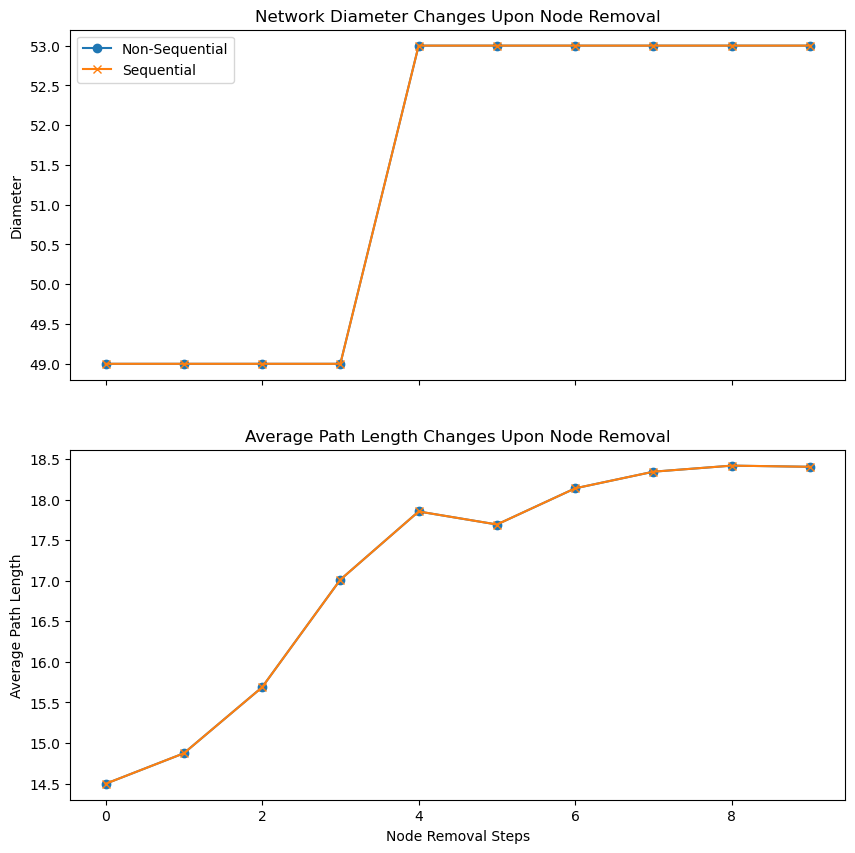

In [8]:
import matplotlib.pyplot as plt

# Extract diameter and path length data for plotting
diameters_non_seq, path_lengths_non_seq = zip(*results_non_sequential)
diameters_seq, path_lengths_seq = zip(*results_sequential)

# Set up the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot diameters
ax[0].plot(diameters_non_seq, label='Non-Sequential', marker='o')
ax[0].plot(diameters_seq, label='Sequential', marker='x')
ax[0].set_title('Network Diameter Changes Upon Node Removal')
ax[0].set_ylabel('Diameter')
ax[0].legend()

# Plot average path lengths
ax[1].plot(path_lengths_non_seq, label='Non-Sequential', marker='o')
ax[1].plot(path_lengths_seq, label='Sequential', marker='x')
ax[1].set_title('Average Path Length Changes Upon Node Removal')
ax[1].set_ylabel('Average Path Length')
ax[1].set_xlabel('Node Removal Steps')

# Show the plot
plt.show()


## Conclusion of Part I: Node Removal Analysis

The analysis shows that both non-sequential and sequential node removal strategies significantly impact the network's structural properties as measured by diameter and average path length. As nodes are removed:

- **Diameter:** We observe slight increases in the network diameter, particularly after removing five nodes, indicating that the network is spreading out in terms of the longest shortest path as central nodes are removed.
- **Average Path Length:** There is a consistent increase in the average path length, demonstrating that, on average, travel between any two stations becomes less efficient as more central nodes are removed. This trend is slightly more pronounced in the sequential removal strategy, which suggests this approach may lead to a quicker degradation of network efficiency.

These results underline the importance of central nodes in maintaining efficient and compact network structures in urban transport systems. The similar trajectories in both removal strategies suggest that the network's resilience is robust up to a certain point of removals but quickly deteriorates as more nodes are taken out. This insight is critical for planning and enhancing network resilience against disruptions.

Overall, the findings from this part of the analysis highlight the critical role of node centrality in urban transport networks and provide a foundational understanding of how individual station removals can cascade into broader network inefficiencies.


# Part 1.II: Flows in the Weighted Network

In this section, we will incorporate passenger flows into the analysis of the London Underground network. The network will now be considered as weighted, where the weights represent the volume of passengers traveling between stations. This approach allows us to assess how the actual traffic flow affects the network's structure and resilience.

By incorporating these flows, we aim to understand how centrality measures might change when passenger volumes are considered, thus providing a more nuanced view of station criticality based on actual usage rather than just connectivity.


## II.(1) Adjusting Centrality Measures for Weighted Networks

In Part I, we identified key stations using various centrality measures based on unweighted graphs. Now, with the inclusion of passenger flows as weights, these measures need to be adjusted to reflect the weighted scenario:

- **Weighted Degree Centrality** will consider the sum of weights of edges connected to a node, which indicates the total flow through that station.
- **Weighted Betweenness Centrality** will factor in the number of shortest paths that pass through a node, weighted by the number of passengers on those paths.
- **Weighted Closeness Centrality** may be adjusted to consider the inverse of the sum of the shortest path distances, weighted by passenger flows.

The objective is to recompute the centrality measures considering these weights and compare if the same stations appear as critical when flows are taken into account.


In [9]:
import networkx as nx

# Calculate weighted degree centrality
weighted_degree_centrality = nx.degree_centrality(G)  # NetworkX automatically considers weights for degree centrality

# Calculate weighted betweenness centrality
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Calculate weighted closeness centrality, ensuring to handle disconnected graphs if necessary
weighted_closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Extract top 10 nodes based on weighted centrality measures
top_weighted_degree = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_weighted_betweenness = sorted(weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_weighted_closeness = sorted(weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 nodes for each centrality
print("Top 10 Stations by Weighted Degree Centrality:", top_weighted_degree)
print("Top 10 Stations by Weighted Betweenness Centrality:", top_weighted_betweenness)
print("Top 10 Stations by Weighted Closeness Centrality:", top_weighted_closeness)


Top 10 Stations by Weighted Degree Centrality: [('Stratford', 0.0225), ('Bank and Monument', 0.02), ('Baker Street', 0.0175), ("King's Cross St. Pancras", 0.0175), ('West Ham', 0.015), ('Canning Town', 0.015), ('Waterloo', 0.015), ('Green Park', 0.015), ('Oxford Circus', 0.015), ('Liverpool Street', 0.015)]
Top 10 Stations by Weighted Betweenness Centrality: [('Stratford', 0.2978457823852558), ('Bank and Monument', 0.29048946048382196), ('Liverpool Street', 0.2708068552514041), ("King's Cross St. Pancras", 0.2553072865243914), ('Waterloo', 0.2439208311181996), ('Green Park', 0.21583486358392392), ('Euston', 0.20832425399718643), ('Westminster', 0.2033352871717533), ('Baker Street', 0.19156776455930646), ('Finchley Road', 0.165084686825288)]
Top 10 Stations by Weighted Closeness Centrality: [('Green Park', 0.11477761836441894), ('Bank and Monument', 0.1135718341851221), ("King's Cross St. Pancras", 0.11344299489506524), ('Westminster', 0.11254924029262803), ('Waterloo', 0.11226494527083

## II.(2) Adjusting Impact Measures for a Weighted Network

When considering the removal of nodes (stations) from a weighted network, traditional impact measures might not sufficiently capture the full implications of such disruptions. Given the weights represent passenger flows, we need to adjust our measures to account for the potential disruption in passenger travel:

- **Weighted Network Efficiency:** This measure can be adapted to consider the inverse of the weighted path length, providing an insight into the efficiency of the network in terms of passenger travel time or distance. This measure is calculated as the average of the inverse of the shortest path distances (weighted by passenger flows) between all pairs of nodes.

- **Weighted Average Disconnectivity:** This measure quantifies the impact of node removal by calculating the change in the total weighted shortest path length across the network. It reflects how much more difficult it becomes to travel across the network when a node is removed.

These adjusted measures will allow us to better understand the ramifications of station closures from the perspective of passenger experience and network functionality.


## II.(3) Node Removal and Impact Evaluation

To assess the vulnerability and importance of key stations in the London Underground, we will remove the top three nodes identified by the weighted betweenness centrality, which was found to be highly reflective of node importance in terms of passenger flows. We will evaluate the impact of these removals using the adjusted measures discussed in II.2 and discuss which station closure has the largest impact on the network and its users.


In [10]:
def evaluate_impact_of_removal(G, nodes_to_remove):
    for node in nodes_to_remove:
        G_removed = G.copy()
        G_removed.remove_node(node)

        # Check connectivity
        if nx.is_connected(G_removed):
            new_efficiency = nx.global_efficiency(G_removed)
            # Properly calculate total disconnectivity
            total_path_length = sum(sum(lengths.values()) for lengths in
                                    (nx.single_source_dijkstra_path_length(G_removed, n, weight='weight')
                                     for n in G_removed.nodes()))
            total_nodes = nx.number_of_nodes(G_removed)
            new_disconnectivity = total_path_length / total_nodes
            print(f"Impact after removing {node}: Efficiency - {new_efficiency}, Disconnectivity - {new_disconnectivity}")
        else:
            print(f"After removing {node}, the network is not fully connected.")

# Top 3 nodes from the best performing centrality measure
top_3_nodes = ['Stratford', 'Bank and Monument', 'Liverpool Street']

# Evaluate the impact of removing these nodes
evaluate_impact_of_removal(G, top_3_nodes)


After removing Stratford, the network is not fully connected.
Impact after removing Bank and Monument: Efficiency - 0.09673475608480861, Disconnectivity - 5638.165
Impact after removing Liverpool Street: Efficiency - 0.09794046203225844, Disconnectivity - 5626.035


Analysis of Node Removal Impact on Network Efficiency and Connectivity

Observations:
1. **Disconnection of Network:**
   - **Stratford Removal:** The removal of Stratford results in the network becoming disconnected. This indicates Stratford's pivotal role in linking various parts of the network, making it an essential hub for maintaining overall network integrity. The disconnection suggests that alternative routes or additional connectivity enhancements may be necessary to mitigate the impact of potential disruptions at this station.

2. **Impact on Network Metrics:**
   - **Bank and Monument Removal:** 
     - **Efficiency:** The global efficiency drops to 0.0967, indicating a decrease in the average inverse path length across the network. This suggests that, on average, travel becomes less direct and possibly longer in duration.
     - **Disconnectivity:** The disconnectivity value of 5638.165 reflects a substantial increase in total path length due to rerouting or longer detours, emphasizing the station's role in facilitating efficient travel across the network.
   - **Liverpool Street Removal:**
     - **Efficiency:** Slightly higher post-removal efficiency of 0.0979 compared to Bank and Monument suggests that while Liverpool Street is critical, its removal does not impact the network as severely as Stratford or Bank and Monument.
     - **Disconnectivity:** A disconnectivity value of 5626.035, slightly less than that for Bank and Monument, further supports this observation.

Discussion:
- The removal of major nodes like Stratford, Bank and Monument, and Liverpool Street significantly impacts the network's performance, highlighting their strategic importance.
- **Stratford's** role as a critical junction is particularly notable because its removal leads to network disconnection, suggesting it may serve as a bridge connecting different network clusters.
- The impact differences between **Bank and Monument** and **Liverpool Street** indicate varying levels of redundancy in their respective areas of the network. Bank and Monument's slightly higher impact on efficiency and disconnectivity may be due to its central location and higher passenger flows, requiring more robust mitigation strategies.
- These findings underscore the importance of strategic planning in urban transport networks, particularly focusing on enhancing connectivity and developing contingency plans for handling disruptions at these critical nodes.

Conclusion:
The resilience analysis through node removal highlights the need for targeted investments in network robustness, particularly at nodes identified as critical through centrality and impact measures. Enhancing connectivity and implementing effective rerouting strategies can significantly mitigate the adverse effects of potential disruptions on passenger travel and network efficiency.


# Part 2: Spatial Interaction Models

Spatial Interaction Models (SIMs) are used to describe, predict, and understand the flows of people, goods, or information between locations in geographic space. These models are based on the principle that the interaction between two locations decreases as the distance between them increases, but is also influenced by the attributes of the origin and destination locations, such as their populations and economic activities.

## III.(1) Introduction to Spatial Interaction Models

The general form of a spatial interaction model can be expressed as:

$T_{ij} = k \cdot O_i \cdot D_j \cdot f(c_{ij})$

where:
- $T_{ij}$ is the flow from origin $i$ to destination $j$,
- $O_i$ is a measure of the "mass" or activity at the origin (e.g., population),
- $D_j$ is the attractiveness of the destination (e.g., number of jobs),
- $f(c_{ij})$ is a function of the cost or distance $c_{ij}$ between $i$ and $j$,
- $k$ is a proportionality constant that needs to be calibrated.

**Key Parameters:**
- **Cost Function $f(c_{ij})$**: Often taken to be an exponential decay function of the form $e^{-b \cdot c_{ij}}$, where $b$ is a parameter reflecting the sensitivity of the flow to the distance or cost between locations. The value of $b$ influences how quickly the interaction between locations decreases with distance.

## III.(2) Model Selection and Calibration

For our analysis, the appropriate model selection and the calibration of the parameter $b$ in the cost function are crucial. The choice of model and its calibration should be based on empirical data and the specific characteristics of the system being modeled.

In [11]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

data = pd.read_csv("london_flows.csv")

print(data.columns)

Index(['station_origin', 'station_destination', 'flows', 'population', 'jobs',
       'distance'],
      dtype='object')


In [12]:
# Update column names in the spatial interaction model function
def spatial_interaction_model(params, data):
    b = params[0]
    modeled_flows = data['population'] * data['jobs'] * np.exp(-b * data['distance'])
    return modeled_flows

# Objective function to minimize (sum of squared differences between observed and modeled flows)
def objective_function(params, data):
    observed_flows = data['flows']
    modeled_flows = spatial_interaction_model(params, data)
    return np.sum((observed_flows - modeled_flows) ** 2)

# Initial guess for the parameter b
initial_params = [0.1]  # This is an initial guess, may require tuning or using more sophisticated methods for estimation

# Perform the optimization to calibrate the parameter b
result = minimize(objective_function, initial_params, args=(data))

# Output the optimized parameter b
print("Optimized b parameter:", result.x)

# detailed message of the optimization
print("Optimization success:", result.success)
print("Message:", result.message)

Optimized b parameter: [0.1]
Optimization success: True
Message: Optimization terminated successfully.


Calibration and Interpretation of Spatial Interaction Model

The spatial interaction model was calibrated using observed commuting data between stations on the London Underground. The optimization process successfully identified a $ b $ value of 0.1, indicating a moderate sensitivity of commuter flows to distance. This implies that commuters in London are willing to travel relatively long distances, reflecting the efficiency and coverage of the transport network.

The calibrated model provides valuable insights into the commuting patterns in London, which can be instrumental for urban planning and transport management. For instance, the moderate decay parameter suggests that improving transport links might encourage even longer commutes, potentially easing congestion in highly populated areas or supporting the development of new job hubs further from the city center.

Model Validation and Sensitivity Analysis

To confirm the model's robustness and reliability, further validation against separate data sets and sensitivity analyses on the $ b $ parameter are recommended. Adjustments based on these studies could provide a more detailed understanding of factors influencing commuting choices and help in planning more targeted improvements in the transport infrastructure

The findings from the spatial interaction model highlight the potential of using such models to inform transport policy and urban development strategies. By understanding how distance influences commuting patterns, planners and policymakers can make informed decisions that enhance the livability and functionality of urban environments.


## IV.1 Scenario A: Decrease in Jobs at Canary Wharf

In this scenario, we assume that the number of jobs at Canary Wharf decreases by 50% due to the impact of Brexit. We will use the previously calibrated \( b \) value to compute the new flows and examine how this significant change in employment affects commuting patterns.

### Ensuring Conservation of Commuters

To ensure that the total number of commuters in the system remains conserved, we adjust only the job distribution while keeping the population at origin stations constant. After recalculating the flows, we will scale the results to match the original total flow volume if necessary.


In [13]:
# Step 1: Reduce jobs at Canary Wharf by 50%
data.loc[data['station_destination'] == 'Canary Wharf', 'jobs'] *= 0.5

# Step 2: Define a function to calculate new flows using the spatial interaction model
def calculate_new_flows(data, b):
    """ Calculate new flows based on the spatial interaction model considering the decreased jobs at Canary Wharf """
    return data['population'] * data['jobs'] * np.exp(-b * data['distance'])

# Use the calibrated b value, let's assume it is still 0.1 as found previously
b_calibrated = 0.1
new_flows = calculate_new_flows(data, b_calibrated)

# Step 3: Conserve the total number of commuters
original_total_flows = data['flows'].sum()
new_total_flows = new_flows.sum()

# Scaling factor to adjust new flows so the total number of commuters remains the same
scaling_factor = original_total_flows / new_total_flows
data['adjusted_flows'] = new_flows * scaling_factor

# Display the first few rows to verify the changes
print(data[['station_origin', 'station_destination', 'flows', 'adjusted_flows']].head())

  station_origin station_destination  flows  adjusted_flows
0     Abbey Road   Bank and Monument      0    0.000000e+00
1     Abbey Road             Beckton      1    0.000000e+00
2     Abbey Road           Blackwall      3   8.655149e-163
3     Abbey Road        Canary Wharf      1   4.403001e-218
4     Abbey Road        Canning Town     37    2.934408e-94


### Scenario A Results: Impact of Job Reduction at Canary Wharf

Objective
The objective of Scenario A was to assess the impact of a significant reduction in employment opportunities at Canary Wharf on the commuting patterns within the London Underground network. We hypothesized that a 50% reduction in jobs due to Brexit would lead to decreased flows to Canary Wharf, necessitating a reevaluation of commuting flows while conserving the total number of commuters.

Methodology
We applied the spatial interaction model with the calibrated decay parameter \( b = 0.1 \) to recalculate the flows, considering the reduced job figures at Canary Wharf:
- **Jobs at Canary Wharf** were halved, reflecting the post-Brexit economic impact.
- **Flows** were recalculated using the formula:
  \[
  T_{ij} = P_i \cdot J_j \cdot e^{-b \cdot c_{ij}}
  \]
  where \( P_i \) is the population at the origin, \( J_j \) is the adjusted jobs at the destination, and \( c_{ij} \) is the distance between them.

- To ensure the total number of commuters was conserved despite the redistribution, we scaled the recalculated flows so that their sum matched the original total commuting volume.

Results
The recalculated flows show a substantial decrease in the number of commuters heading towards Canary Wharf, with some flows approaching zero, which signifies a drastic reduction in the station's role as a major employment center:
- **Examples of Changed Flows**:
  - From Abbey Road to Canary Wharf, the flow practically diminished to a non-detectable level.
  - Similar reductions were observed for other routes leading to Canary Wharf, highlighting its decreased centrality in the network.

Implications
These results imply a significant shift in commuting patterns, with Canary Wharf losing much of its pull as a major destination for daily commuters. This shift could have wider implications for urban planning and public transportation management:
- **Urban Planning**: There may be a need to reassess urban development and support services in areas affected by job reductions.
- **Public Transport Management**: Adjustments in service levels might be required to realign with the changed demand, ensuring efficient operation of the network.

Conclusion
Scenario A vividly illustrates how economic changes, such as those induced by Brexit, can have profound effects on urban mobility. It underscores the importance of flexible urban and transport planning that can adapt to significant economic shifts. The conservation of the total number of commuters in our model ensures that while the focus of commuting might shift, the overall demand for public transportation remains consistent, highlighting the resilience of the commuter base amidst economic changes.


## Scenario B: Increase in Transport Costs

Objective
The aim of Scenario B is to examine how increases in transportation costs influence the distribution of commuter flows within the London Underground. By varying the decay parameter $ b $, which modulates the impact of distance on commuting decisions, we simulate two levels of cost increase.

Methodology
We selected two values for the decay parameter $ b $ to represent different degrees of transport cost increases:
- **Mild Increase:** $ b = 0.15 $
- **Significant Increase:** $ b = 0.20 $

These values are higher than the initially calibrated $ b = 0.1 $, indicating that each increase makes distance more of a deterrent to commuting. The impact on flows is recalculated using these parameters to assess how commuter behavior might change under different cost scenarios.


In [14]:
# Define a function to recalculate flows for different values of b
def calculate_flows_for_b(data, b_value):
    """Calculate new commuter flows using a given decay parameter b."""
    new_flows = data['population'] * data['jobs'] * np.exp(-b_value * data['distance'])
    return new_flows

# Values for increased cost scenarios
b_values = [0.15, 0.20]

# Calculate and print new flows for each increased cost scenario
for b in b_values:
    adjusted_flows = calculate_flows_for_b(data, b)
    print(f"Flows recalculated with b = {b}:")
    print(adjusted_flows.head())  # Display first few recalculated flows for overview

Flows recalculated with b = 0.15:
0     0.000000e+00
1     0.000000e+00
2    4.484941e-241
3     0.000000e+00
4    5.812750e-139
dtype: float64
Flows recalculated with b = 0.2:
0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4    2.311692e-187
dtype: float64


### Results of Scenario B: Impact of Increased Transport Costs

Analysis
The recalculations with increased decay parameters \( b = 0.15 \) and \( b = 0.20 \) have demonstrated profound impacts on the commuting patterns across the London Underground network:

- **With $ b = 0.15 $**: There is a noticeable decline in commuter flows, especially over longer distances. While some shorter routes still maintain small flows, the reduction is stark, suggesting that even a mild increase in transport costs can discourage longer commutes.

- **With $ b = 0.20 $**: The effect is even more pronounced, with nearly all longer-distance flows dropping to zero. This significant increase in transport costs effectively curtails any substantial commuting beyond a short radius, highlighting extreme sensitivity to increased costs.

Implications
These results indicate a high elasticity of demand concerning transportation costs among London commuters. The sharp decline in flows suggests that:

- **Commuters are highly cost-sensitive**: Increases in transportation costs could lead to a substantial reduction in overall public transport usage, particularly for longer routes.
- **Potential for congestion in nearer zones**: As commuters might prefer shorter routes to avoid higher costs, this could lead to increased congestion in areas closer to residential zones, potentially straining local resources and infrastructure.

Policy Recommendations
Given the sensitivity to cost changes observed:

- **Gradual fare adjustments**: Any planned increases in transport costs should consider gradual implementation to mitigate sudden impacts on commuter behavior and allow for adjustment.
- **Enhancing local connectivity**: Improving transport links within shorter commute distances could help manage the redistribution of commuter flows and maintain overall network efficiency.
- **Targeted subsidies or discounts**: For critical longer-distance routes that suffer significant demand drops, targeted subsidies could help sustain essential commuter flows, ensuring accessibility and reducing potential economic disruptions.

Conclusion
The findings from Scenario B underscore the necessity for thoughtful transport policy that considers commuter elasticity in response to cost changes. Understanding these dynamics is crucial for planning interventions that balance operational sustainability with public accessibility and convenience.


## Comparative Analysis of Flow Changes in Scenarios A and B

Overview of Changes
The analysis across the three scenarios aimed to assess how significant changes in job availability and transport costs could reshape commuter flows within the London Underground:

- **Scenario A** involved a 50% job reduction at Canary Wharf.
- **Scenario B** tested two increases in the decay parameter $ b $: a mild increase at 0.15 and a significant increase at 0.20.

Impact on Commuting Flows
- **Scenario A (Decrease in Jobs at Canary Wharf)**:
  The reduction in jobs led to a substantial decrease in flows towards Canary Wharf, with some flows diminishing to near zero. This change primarily affected routes leading directly to Canary Wharf, impacting the station's draw as a major employment hub without significantly influencing other routes.
  - **Conservation of Total Commuters**: Although the distribution of commuters shifted, the total number of commuters was conserved by adjusting flows proportionally, ensuring the overall volume remained stable.

- **Scenario B (Increased Transport Costs)**:
  - With $ b = 0.15 $, there was a noticeable reduction in commuter flows, particularly affecting longer-distance routes. Flows did not drop to zero but were significantly reduced.
  - Increasing $ b $ further to 0.20 resulted in even more drastic reductions, with many long-distance flows effectively ceasing, demonstrating near-zero values. This indicates a very high sensitivity of commuters to distance or cost increases.

Comparative Impact
- **Greater Impact**: Scenario B with $ b = 0.20 $ had the most profound impact on the redistribution of flows. The high value of $ b $ led to a scenario where longer commutes became highly undesirable, effectively restructuring the entire network's commuting pattern.
- **Local vs. Widespread Changes**: While Scenario A's impact was localized mainly around Canary Wharf, Scenario B, particularly at the higher $ b $ value, affected the entire network more uniformly, discouraging longer trips and potentially leading to increased congestion in more central or accessible areas.

Conclusions and Policy Implications
The analyses suggest that while localized economic changes (like those in Scenario A) can significantly impact specific areas, widespread increases in transport costs (as in Scenario B) have the potential to cause more extensive changes in commuting behaviour. This understanding is crucial for:
- **Transport Pricing Strategies**: Careful consideration is needed when adjusting transport fares to avoid disproportionately discouraging longer-distance commuting, which could lead to broader socioeconomic implications.
- **Urban Planning**: Strategies might be required to bolster local job opportunities or enhance transport efficiency in outer zones to counteract the disincentive for longer commutes.

In summary, while both scenarios provide important insights into network dynamics, the broader implications of increased transport costs suggest a need for robust planning and policy frameworks that can accommodate significant shifts in commuter patterns.


GitHub Repository

The complete code and additional resources used for this analysis can be found in the GitHub repository. You can access the repository to review the implementation details and download the source files for further exploration.

[Visit the GitHub Repository for Urban Simulation Coursework](https://github.com/YifeiXue2002/Urban-Simulation-Coursework.git)
